## Detectando Outliers

1. Boxplot
2. Histograma
3. Média e Desvio Padrão
4. IQR (Inter Quartile Range ou, em português, Intervalo Interquartil)
5. Z-score
6. Percentil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Boxplot

Text(0.5, 1.0, 'Boxplot of Total Bill')

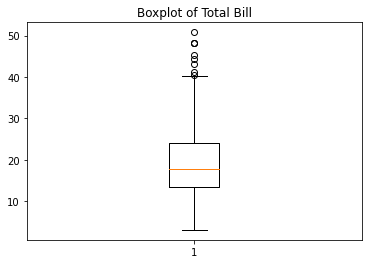

In [4]:
plt.boxplot(tips['total_bill'])
plt.title("Boxplot of Total Bill")

### Histograma

Text(0.5, 1.0, 'Distribution of Total Bill')

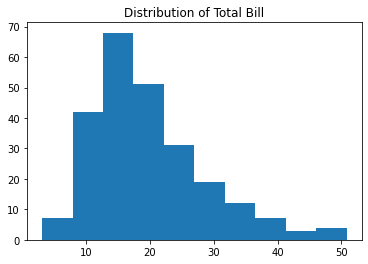

In [5]:
plt.hist(tips['total_bill'])
plt.title("Distribution of Total Bill")

# A distribuição mostra que os dados são assimétricos e do lado direito existem outliers.

### Método de Média e Desvio Padrão

In [6]:
total_bill = tips['total_bill']

mean = np.mean(total_bill)
std = np.std(total_bill)

In [15]:
outlier_upper = [i for i in total_bill if i > mean+3*std]

outlier_lower = [i for i in total_bill if i < mean-3*std]

print("Upper: ", outlier_upper)
print("Lower: ", outlier_lower)

# Aqui podemos ver que, por esse método, temos outliers na extremidade superior, mas na extremidade inferior não há.
# Nesse exemplo foi usado o fator 3, porém pode ser usado qualquer outro número, sendo o 2, 3 ou 4 os mais utilizados.

Upper:  [48.27, 48.17, 50.81, 48.33]
Lower:  []


### Intervalo Interquartil (Inter Quartile Range)

In [17]:
total_bill_sort = sorted(total_bill)

In [18]:
q1 = np.percentile(total_bill_sort, 25)
q3 = np.percentile(total_bill_sort, 75)

IQR = q3 - q1
lower = q1 - (1.5 * IQR)
upper = q3 + (1.5 * IQR)

In [20]:
outliers = [i for i in total_bill_sort if i < lower or i > upper]
outliers

# Se o valor for menor ou maior  do que os limites das duas extremidades, pode ser considerado um outlier

[40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81]

### Z-score

In [29]:
# Basta corrigir um limite de z-score e, se o z-score for maior que isso, os dados serão discrepantes.
threshold = 2.5
mean = np.mean(total_bill)
std = np.std(total_bill)
outliers = [i for i in total_bill if (i-mean)/std > threshold]
outliers

[48.27, 44.3, 48.17, 50.81, 45.35, 43.11, 48.33]

### Cálculo Percentil 

In [34]:
fif_percentil = np.percentile(total_bill, 5)
nf_percentil = np.percentile(total_bill, 95)

outliers = [i for i in total_bill_sort if i < fif_percentil or i > nf_percentil]
outliers

# São todos outliers

[3.07,
 5.75,
 7.25,
 7.25,
 7.51,
 7.56,
 7.74,
 8.35,
 8.51,
 8.52,
 8.58,
 8.77,
 9.55,
 38.07,
 38.73,
 39.42,
 40.17,
 40.55,
 41.19,
 43.11,
 44.3,
 45.35,
 48.17,
 48.27,
 48.33,
 50.81]

## Lidando com outliers

### Removendo os outliers

Text(0.5, 1.0, 'Boxplot of Total Bill')

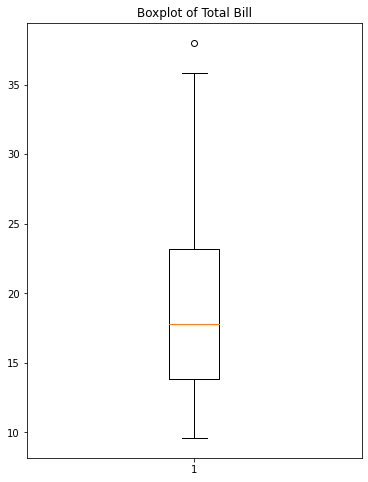

In [46]:
# O jeito mais comum. Ás vezes é mais fácil apenas deletar os outliers da tabela

no_outliers = [i for i in total_bill if i not in outliers]

plt.figure(figsize = (6, 8))
plt.boxplot(no_outliers)
plt.title("Boxplot of Total Bill")

### Percentile Based Flooring and Capping

In [49]:
data_fixed = np.where(total_bill < fif_percentil, fif_percentil, total_bill)
data_fixed = np.where(data_fixed > nf_percentil, nf_percentil, data_fixed)

Text(0.5, 1.0, 'Boxplot of Total Bill')

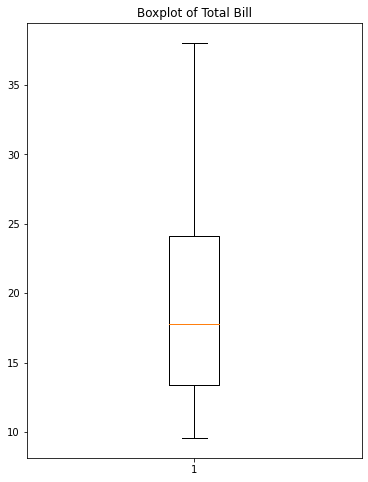

In [50]:
plt.figure(figsize = (6, 8))
plt.boxplot(data_fixed)
plt.title("Boxplot of Total Bill")

### Binning

In [52]:
# O Binning categoriza os dados e evitará totalmente os outliers. Em vez disso, tornaráos dados categóricos

tips['total_bill'] = pd.cut(tips['total_bill'], bins = [0, 10, 20, 30, 40, 55], labels = ['Very Low', 'Low', 'Average', 'High', 'Very High'])
tips['total_bill']

0          Low
1          Low
2      Average
3      Average
4      Average
        ...   
239    Average
240    Average
241    Average
242        Low
243        Low
Name: total_bill, Length: 244, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Average' < 'High' < 'Very High']

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris['data']
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Normalização (Normalization)

A normalização é uma técnica de escala na qual os valores são deslocados e redimensionados para que fiquem entre 0 e 1. Também é conhecida como escala Min-Máx

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:
scaler.fit_transform(X)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Padronização (Standardization)

A padronização é uma técnica de dimensionamento em que os valores são centralizados em torno da média com um desvio padrão da unidade. Isso significa que a média do atributo torna-se zero e a distribuição resultante tem um desvio padrão da unidade

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler_two = StandardScaler()

In [9]:
scaler_two.fit_transform(X)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Quando normalizar e padronizar?

* A normalização é boa para usar quando você sabe que a distribuição de seus dados não segue uma distribuição Gaussiana. Isso pode ser útil em algoritmos que não assumem nenhuma distribuição de dados, como K-vizinhos mais próximos e redes neurais.


* A padronização, por outro lado, pode ser útil nos casos em que os dados seguem uma distribuição gaussiana. No entanto, isso não precisa ser necessariamente verdade. Além disso, ao contrário da normalização, a padronização não tem um intervalo delimitador. Portanto, mesmo que você tenha valores discrepantes em seus dados, eles não serão afetados pela padronização.


#### Obs: não há uma resposta correta para quando usar normalização em vez de padronização e vice-versa. É preciso ir testando para saber!